In [1]:
# Fuzzy Inference System Tsukamoto

import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Kelas untuk fungsi keanggotaan (Membership Function)
class MembershipFunction:
    def __init__(self, name, points):
        self.name = name
        self.points = points

    def calculate(self, x):
        if x <= self.points[0] or x >= self.points[-1]:
            return 0.0
        elif self.points[0] < x < self.points[1]:
            return (x - self.points[0]) / (self.points[1] - self.points[0])
        elif self.points[1] <= x <= self.points[2]:
            return 1.0
        elif self.points[2] < x < self.points[3]:
            return (self.points[3] - x) / (self.points[3] - self.points[2])
        else:
            return 0.0

    def plot(self, x_range):
        y_values = [self.calculate(x) for x in x_range]
        plt.plot(x_range, y_values, label=self.name)


In [3]:
# Kelas untuk Fuzzification
class Fuzzification:
    def __init__(self, membership_functions):
        self.membership_functions = membership_functions

    def fuzzify(self, x):
        fuzzy_values = {}
        for mf in self.membership_functions:
            fuzzy_values[mf.name] = mf.calculate(x)
        return fuzzy_values

In [4]:
# Kelas untuk Rule Evaluation
class RuleEvaluation:
    def __init__(self, rules):
        self.rules = rules

    def evaluate(self, fuzzy_demand, fuzzy_supply):
        rule_results = []
        for rule in self.rules:
            demand_level, supply_level, output = rule
            rule_strength = min(fuzzy_demand[demand_level], fuzzy_supply[supply_level])
            rule_results.append((rule_strength, output))
        return rule_results

In [5]:
# Kelas untuk Defuzzification (Metode Tsukamoto)
class Defuzzification:
    def __init__(self, output_functions):
        self.output_functions = output_functions

    def defuzzify(self, rule_results):
        numerator = 0.0
        denominator = 0.0
        for strength, output_name in rule_results:
            output_function = self.output_functions[output_name]
            crisp_value = sum(output_function.points) / len(output_function.points)
            numerator += strength * crisp_value
            denominator += strength
        return numerator / denominator if denominator != 0 else 0.0

In [6]:
# Inisialisasi fungsi keanggotaan
# Permintaan (Demand)
demand_low = MembershipFunction("turun", [0, 0, 2000, 4000])
demand_stable = MembershipFunction("tetap", [2000, 4000, 4000, 6000])
demand_high = MembershipFunction("naik", [4000, 6000, 7000, 7000])

# Persediaan (Supply)
supply_low = MembershipFunction("sedikit", [0, 0, 200, 400])
supply_medium = MembershipFunction("sedang", [200, 400, 600, 800])
supply_high = MembershipFunction("banyak", [600, 800, 1000, 1000])

# Produksi
output_decrease = MembershipFunction("berkurang", [0, 0, 4000, 8000])
output_increase = MembershipFunction("bertambah", [4000, 8000, 10000, 10000])

In [7]:
# Definisi aturan
rules = [
    ("turun", "sedikit", "bertambah"),
    ("turun", "sedang", "berkurang"),
    ("turun", "banyak", "berkurang"),
    ("tetap", "sedikit", "bertambah"),
    ("tetap", "sedang", "berkurang"),
    ("tetap", "banyak", "berkurang"),
    ("naik", "sedikit", "bertambah"),
    ("naik", "sedang", "bertambah"),
    ("naik", "banyak", "berkurang"),
]


In [8]:
# Inisialisasi komponen
fuzzification_demand = Fuzzification([demand_low, demand_stable, demand_high])
fuzzification_supply = Fuzzification([supply_low, supply_medium, supply_high])
rule_evaluation = RuleEvaluation(rules)
defuzzification = Defuzzification({"berkurang": output_decrease, "bertambah": output_increase})


In [9]:
# Input nilai
input_demand = 3500
input_supply = 500


In [10]:
# Proses Fuzzy Inference
fuzzy_demand = fuzzification_demand.fuzzify(input_demand)
fuzzy_supply = fuzzification_supply.fuzzify(input_supply)
rule_results = rule_evaluation.evaluate(fuzzy_demand, fuzzy_supply)
final_output = defuzzification.defuzzify(rule_results)

In [11]:
# Output hasil
print("Hasil Defuzzifikasi (Produksi):", final_output)

Hasil Defuzzifikasi (Produksi): 3000.0


In [12]:
# Visualisasi Grafik
x_demand = np.linspace(0, 7000, 1000)
x_supply = np.linspace(0, 1000, 1000)
x_output = np.linspace(0, 10000, 1000)

plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

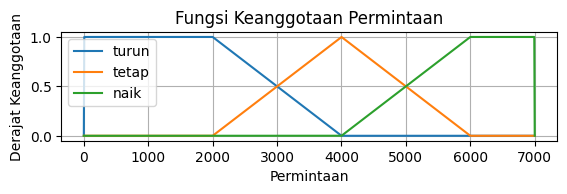

In [13]:
# Plot Permintaan
plt.subplot(3, 1, 1)
plt.title("Fungsi Keanggotaan Permintaan")
demand_low.plot(x_demand)
demand_stable.plot(x_demand)
demand_high.plot(x_demand)
plt.xlabel("Permintaan")
plt.ylabel("Derajat Keanggotaan")
plt.grid(True)
plt.legend()

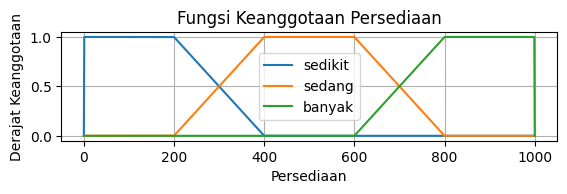

In [14]:
# Plot Persediaan
plt.subplot(3, 1, 2)
plt.title("Fungsi Keanggotaan Persediaan")
supply_low.plot(x_supply)
supply_medium.plot(x_supply)
supply_high.plot(x_supply)
plt.xlabel("Persediaan")
plt.ylabel("Derajat Keanggotaan")
plt.grid(True)
plt.legend()

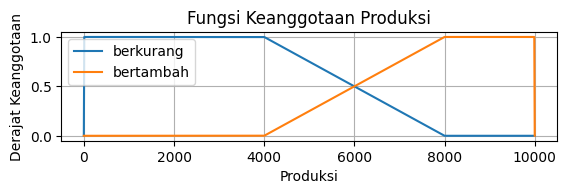

In [15]:
# Plot Produksi
plt.subplot(3, 1, 3)
plt.title("Fungsi Keanggotaan Produksi")
output_decrease.plot(x_output)
output_increase.plot(x_output)
plt.xlabel("Produksi")
plt.ylabel("Derajat Keanggotaan")
plt.grid(True)
plt.legend()

In [16]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [17]:
print("Demand Low:", [demand_low.calculate(x) for x in np.linspace(0, 7000, 5)])
print("Supply Medium:", [supply_medium.calculate(x) for x in np.linspace(0, 1000, 5)])
print("Output Increase:", [output_increase.calculate(x) for x in np.linspace(0, 10000, 5)])


Demand Low: [0.0, 1.0, 0.25, 0.0, 0.0]
Supply Medium: [0.0, 0.25, 1.0, 0.25, 0.0]
Output Increase: [0.0, 0.0, 0.25, 0.875, 0.0]
